In [4]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
from PIL import Image
import glob
from numpy import asarray
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# Rand Index

In [5]:
def ri(data_with_label, k = 41):
    pred_cluster_dict = {} # key is label predicted by kmeans, values are pic_nums of pics that are labeled with the respected key
    for i, pred_cluster in enumerate(data_with_label[:, 3]): 
        if pred_cluster in pred_cluster_dict.keys():
          pred_cluster_dict[pred_cluster].append(data_with_label[i][0])
        else:
          pred_cluster_dict[pred_cluster] = [data_with_label[i][0]]
    
    data_label_dict = {} # key is pic_num, values are true_label(original label) of that key
    for i, data_id in enumerate(data_with_label[:, 0]): 
        data_label_dict[data_id] = data_with_label[i][1]
    
    data_pop_dict = {} # key is original cluster numnber, value is population
    for i, label in enumerate(data_with_label[:, 1]):
        if label in data_pop_dict.keys():
          data_pop_dict[label]+=1
        else:
          data_pop_dict[label] = 1
    
    TP_FP = 0
    for key in pred_cluster_dict:
        Ni = len(pred_cluster_dict[key])
        TP_FP += int((Ni * (Ni-1))/2)
        
    TP = 0
    for key in pred_cluster_dict: 
        item_count = {}
        # print(label_dict[key])
        for item in pred_cluster_dict[key]:
            if data_label_dict[item] in item_count.keys():
                item_count[data_label_dict[item]]+= 1
            else:
                item_count[data_label_dict[item]] = 1
        # print(item_count)

        for i in item_count.keys():
            same_items = item_count[i]
            TP += int(same_items * (same_items-1)/2)
            # print(TP)
    
    FP = TP_FP - TP

    FN = 0
    for data_type in data_pop_dict:
        Ni = data_pop_dict[data_type]
        TPi = 0
        for key in pred_cluster_dict:
            pop_in_curr_cluster = 0
            for data in pred_cluster_dict[key]:
                if data_label_dict[data] == data_type:
                    pop_in_curr_cluster += 1
            TPi += int(pop_in_curr_cluster * (pop_in_curr_cluster-1)/2)
        #print(TPi)
        FN += int((Ni * (Ni-1)/2) - TPi)
    
    N = 0
    for data_type in data_pop_dict:
        N += data_pop_dict[data_type]
    TN = int(N*(N-1)/2 - (FN + TP + FP))

    RI = (TP + TN) / (TP + TN + FP + FN)
    return RI

In [6]:
def print_dict(data_with_label):
    pred_cluster_dict = {} # key is label predicted by kmeans, values are pic_nums of pics that are labeled with the respected key
    for i, pred_cluster in enumerate(data_with_label[:, 3]): 
        if pred_cluster in pred_cluster_dict.keys():
          pred_cluster_dict[pred_cluster].append(data_with_label[i][0])
        else:
          pred_cluster_dict[pred_cluster] = [data_with_label[i][0]]
    
    for keys,values in pred_cluster_dict.items():
        print(keys)
        print(values)

# Data Preprocessing

In [7]:
filelist = glob.glob('ORL/*.jpg')
list = []
for fname in filelist:
    pic_num = int(fname.split("\\")[-1].split(".")[0].split("_")[0])
    cluster_num = int(fname.split("\\")[1].split(".")[0].split("_")[1])
    img_arr = asarray(Image.open(fname).convert('L')).flatten()
    list.append([pic_num, cluster_num, img_arr])
    #print(img_arr)

#1, 2, 3(arr)
data = np.array(list)

data.shape, list[0]

((410, 3), [100, 10, array([100, 118, 111, ...,  21,  20,  21], dtype=uint8)])

# KMEANS

In [8]:
kmeans = KMeans(n_clusters=41, init = 'random', n_init = 1, random_state=11).fit(np.stack(data[:, 2]))
output_labels0 = np.array(kmeans.labels_).reshape((len(kmeans.labels_), 1))
data_with_label0 = np.append(data, output_labels0, axis=1)
ri(data_with_label0), print_dict(data_with_label0)

38
[100, 266, 268, 269, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]
2
[101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 139]
24
[10, 126, 171, 172, 174, 177, 179, 2]
18
[111, 116, 118, 129, 173, 175, 176, 178, 180, 392, 395, 45, 46, 48, 49, 50]
17
[112, 113, 114, 115, 117, 119, 120]
7
[11, 13, 151, 156, 15, 161, 17, 189, 18, 20, 272, 279]
10
[121, 122, 123, 124, 125, 127, 128, 130, 244, 245, 248, 25, 394, 397, 400, 41, 42, 43, 44, 47]
13
[12, 141, 143, 144, 146, 148, 14, 16, 19, 231, 235, 237, 316, 317, 319, 320]
35
[131, 132, 133, 134, 135, 136, 137, 138, 140, 362, 364, 365, 366, 368]
40
[142, 145, 147, 149, 150, 341]
21
[152, 153, 157, 158, 159, 160, 1, 3, 7]
23
[154, 155]
0
[162, 165, 222, 228, 85, 90]
26
[163, 164, 21, 241, 243, 246, 247, 249, 24, 250, 251, 252, 253, 256, 259, 26, 27, 28, 29, 30]
19
[166, 167, 168, 169, 170, 352]
34
[181, 182, 183, 184, 185, 186, 187, 188, 190, 261, 262, 263, 264, 265, 270, 274, 275, 277]
36
[191, 192, 193, 194, 195, 196, 197, 198, 199, 200]
20
[201, 

(0.9754904884012165, None)

# AGGLOMERATIVE

### Average Link

In [9]:
k = 41
agglo = AgglomerativeClustering(n_clusters = k, linkage = 'average').fit(np.stack(data[:, 2]))
output_labels2 = np.array(agglo.labels_).reshape((len(agglo.labels_), 1))
data_with_label2 = np.append(data, output_labels2, axis=1)

ri(data_with_label2), print_dict(data_with_label2)

36
[100]
1
[101, 103, 106, 107, 108, 109, 110]
32
[102]
20
[104, 105]
30
[10, 5, 8, 9]
9
[111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260]
8
[11, 12, 13, 141, 143, 144, 146, 148, 14, 15, 16, 17, 18, 19, 20, 317]
3
[121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 142, 145, 147, 149, 150, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 244, 245, 248, 24, 25, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
6
[131, 132, 133, 134, 135, 136, 137, 138, 139, 140]
40
[151, 156]
2
[152, 153, 157, 158, 159, 160, 1, 3, 7]
23
[154, 155]
0
[161, 162, 163, 164, 165, 21, 22, 23, 241, 242, 243, 246, 247, 249, 250, 26, 27, 28, 29, 30, 31, 32, 33, 342, 344, 346, 347, 348, 34, 35, 36, 37, 38, 39, 40]
7
[166, 167, 168, 169, 170, 352, 356, 357]
15
[181, 182, 183, 184, 185, 186, 187, 188, 190, 261, 262, 263, 264, 265, 270]
34
[189, 360]
14
[191, 192, 193, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 281

(0.9560140735881686, None)

### Single Link

In [10]:
k = 41
agglo = AgglomerativeClustering(n_clusters = 60, linkage = 'single').fit(np.stack(data[:, 2]))
output_labels3 = np.array(agglo.labels_).reshape((len(agglo.labels_), 1))
data_with_label3 = np.append(data, output_labels3, axis=1)

ri(data_with_label3), print_dict(data_with_label3)

37
[100]
0
[101, 102, 103, 106, 107, 108, 109, 110]
20
[104, 105]
40
[10]
13
[111, 112, 113, 114, 115, 116, 117, 118, 119, 120]
32
[11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
1
[121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 142, 145, 147, 149, 150, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 21, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 22, 230, 23, 241, 242, 243, 244, 245, 246, 247, 248, 249, 24, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 25, 260, 26, 271, 273, 276, 27, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 28, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 29, 300, 301, 306, 307, 308, 309, 30, 31, 321, 322, 323, 324, 325, 326, 327, 328, 329, 32, 330, 33, 342, 344, 346, 347, 348, 34, 35, 361, 363, 367, 369, 36, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 37, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 38, 390

(0.7650187846621742, None)

### Complete Link

In [11]:
k = 41
agglo = AgglomerativeClustering(n_clusters = k, linkage = 'complete').fit(np.stack(data[:, 2]))
output_labels4 = np.array(agglo.labels_).reshape((len(agglo.labels_), 1))
data_with_label4 = np.append(data, output_labels4, axis=1)

ri(data_with_label4), print_dict(data_with_label4)

2
[100, 189, 266, 267, 268, 269, 31, 33, 360, 36, 38]
34
[101, 102, 103, 106]
7
[104, 105, 136, 137, 138, 139, 140]
23
[107, 108, 109, 110]
30
[10, 5, 8, 9]
27
[111, 112, 113, 114, 115, 116, 117, 118, 119, 120]
1
[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320]
5
[121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 244, 245, 248, 24, 25, 394, 400, 41, 42, 43, 44, 47]
25
[131, 132, 133, 134, 135]
10
[141, 143, 144, 146, 148, 151, 156, 231, 232, 235, 236, 237, 238]
4
[142, 145, 147, 149, 150, 241, 242, 243, 246, 247, 249, 250, 251, 252, 253, 254, 255, 256, 258, 259, 260, 342, 344, 346, 347, 348]
3
[152, 153, 157, 158, 159, 160, 1, 3, 7]
40
[154, 155]
37
[161, 162, 165, 32, 34, 35, 37, 39, 40]
26
[163, 164, 21, 222, 228, 22, 23, 26, 27, 28, 29, 30, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]
12
[166, 167, 168, 169, 170, 233, 234, 239, 240, 352, 356, 357]
16
[171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 392, 393, 395, 397, 399, 45, 46, 48, 49, 50]
1

(0.973248255709941, None)

# DBSCAN

Using KNN for choosing epsilon - https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd

### Choosing epsilon

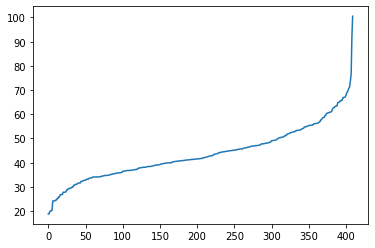

In [12]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(StandardScaler().fit_transform(np.stack(data[:, 2])))
distances, indices = neighbors_fit.kneighbors(StandardScaler().fit_transform(np.stack(data[:, 2])))

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

# the average distance between each point and its k nearest neighbors, 
# where k = the MinPts value you selected. The average k-distances are 
# then plotted in ascending order on a k-distance graph. 
# You’ll find the optimal value for ε at the point of maximum curvature

In [13]:
ep0 = 55
n0 = 4
db = DBSCAN(eps=ep0, min_samples=n0).fit(StandardScaler().fit_transform(np.stack(data[:, 2])))
output_labels5 = np.array(db.labels_).reshape((len(db.labels_), 1))
k0 = max(db.labels_) + 1
# pic num, clust num, img arr, label
data_with_label5 = np.append(data, output_labels5, axis=1)
k0, ri(data_with_label5), print_dict(data_with_label5) 

-1
[100, 102, 104, 105, 107, 108, 109, 10, 111, 113, 114, 116, 118, 119, 123, 124, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 148, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 189, 194, 195, 196, 197, 198, 199, 1, 214, 222, 223, 225, 228, 235, 244, 245, 248, 24, 252, 257, 25, 266, 267, 268, 269, 26, 271, 272, 273, 274, 275, 276, 277, 278, 279, 27, 280, 28, 2, 301, 302, 306, 307, 308, 309, 311, 312, 313, 314, 315, 316, 317, 318, 319, 31, 320, 328, 334, 335, 337, 33, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 368, 36, 381, 382, 383, 384, 385, 386, 387, 388, 389, 38, 390, 391, 393, 396, 399, 3, 401, 402, 403, 404, 405, 406, 407, 408, 409, 40, 410, 4, 5, 6, 7, 86, 87, 8, 91, 92, 93, 94, 95, 96, 97, 98, 99, 9]
0
[101, 103, 106, 110]
1
[112, 115, 117, 120]
2
[11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
3
[121, 122, 125, 126, 127, 128, 129, 130]
4
[141, 143, 144, 146]
5
[142, 145, 147, 149, 150]
6
[166, 

(31, 0.8267398175204246, None)

# Enhanced DBSCAN

Perform DBSCAN clustering on noises iteratively

n_neighbors for plotting...


 4


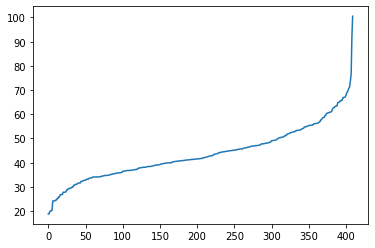

eps...


 55


min_points...


 4


ri:  0.8267398175204246
-1
[100, 102, 104, 105, 107, 108, 109, 10, 111, 113, 114, 116, 118, 119, 123, 124, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 148, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 189, 194, 195, 196, 197, 198, 199, 1, 214, 222, 223, 225, 228, 235, 244, 245, 248, 24, 252, 257, 25, 266, 267, 268, 269, 26, 271, 272, 273, 274, 275, 276, 277, 278, 279, 27, 280, 28, 2, 301, 302, 306, 307, 308, 309, 311, 312, 313, 314, 315, 316, 317, 318, 319, 31, 320, 328, 334, 335, 337, 33, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 368, 36, 381, 382, 383, 384, 385, 386, 387, 388, 389, 38, 390, 391, 393, 396, 399, 3, 401, 402, 403, 404, 405, 406, 407, 408, 409, 40, 410, 4, 5, 6, 7, 86, 87, 8, 91, 92, 93, 94, 95, 96, 97, 98, 99, 9]
0
[101, 103, 106, 110]
1
[112, 115, 117, 120]
2
[11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
3
[121, 122, 125, 126, 127, 128, 129, 130]
4
[141, 143, 144, 146]
5
[142, 145,

 1


n_neighbors for plotting...


 3


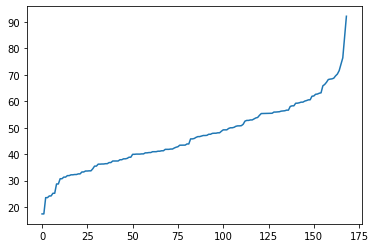

eps...


 60


min_points...


 3


Clustering for noiese: 
-1
[100, 102, 104, 105, 123, 124, 136, 137, 138, 139, 140, 148, 151, 154, 155, 156, 158, 189, 194, 196, 235, 257, 274, 278, 279, 2, 302, 317, 328, 341, 351, 355, 360, 368, 391, 393, 396, 401, 403, 407, 40, 4, 6, 99]
0
[107, 108, 109]
1
[10, 5, 8, 9]
2
[111, 113, 114, 116, 118, 119, 163, 164, 244, 245, 248, 24, 252, 25, 26, 27, 28, 31, 33, 342, 344, 346, 347, 348, 36, 38, 86, 87]
3
[131, 132, 133, 134, 135]
4
[152, 153, 157, 159, 160, 1, 3, 7]
5
[161, 162, 165]
6
[195, 197, 198, 199]
17
[214, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390]
7
[222, 223, 225, 228]
8
[266, 267, 268, 269]
9
[271, 273, 276, 280]
10
[272, 275, 277]
11
[301, 306, 307, 308, 309]
12
[311, 312, 313, 314, 315, 316, 318, 319, 320]
13
[334, 335, 337]
14
[343, 345, 349, 350, 399]
16
[352, 356, 357]
15
[353, 354, 358, 359]
19
[402, 405, 406]
18
[404, 408, 409, 410]
20
[91, 92, 93, 94, 95, 96, 97, 98]
Clustering for  whole data: 
-1
[100, 102, 104, 105, 123, 124, 136, 137, 138, 139, 140, 148, 

 0


In [14]:
print('n_neighbors for plotting...')
n_ne = input()

neighbors = NearestNeighbors(n_neighbors=int(n_ne))
neighbors_fit = neighbors.fit(StandardScaler().fit_transform(np.stack(data[:, 2])))
distances, indices = neighbors_fit.kneighbors(StandardScaler().fit_transform(np.stack(data[:, 2])))

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

print('eps...')
eps = int(input())
print('min_points...')
n = int(input())

db = DBSCAN(eps=eps, min_samples=n).fit(StandardScaler().fit_transform(np.stack(data[:, 2])))
output_labels = np.array(db.labels_).reshape((len(db.labels_), 1))
k = max(db.labels_) + 1
# pic num, clust num, img arr, label
data_with_label = np.append(data, output_labels, axis=1)
print('ri: ', ri(data_with_label))

print_dict(data_with_label)
while True:
    print('continue?')
    confirm = int(input())
    
    if confirm != 1:
        break
    
    noises1 = data_with_label[data_with_label[:, 3] == -1]

    print('n_neighbors for plotting...')
    n_ne1 = input()
    neighbors1 = NearestNeighbors(n_neighbors=int(n_ne1))
    neighbors1_fit = neighbors1.fit(StandardScaler().fit_transform(np.stack(noises1[:, 2])))
    distances1, indices1 = neighbors1_fit.kneighbors(StandardScaler().fit_transform(np.stack(noises1[:, 2])))

    distances1 = np.sort(distances1, axis=0)
    distances1 = distances1[:,1]
    plt.plot(distances1)
    plt.show()

    print('eps...')
    eps1 = int(input())
    print('min_points...')
    n1 = int(input())

    db1 = DBSCAN(eps=eps1, min_samples=n1).fit(StandardScaler().fit_transform(np.stack(noises1[:, 2])))
    output_labels1 = np.array(db1.labels_).reshape((len(db1.labels_), 1))

    # pic num, clust num, img arr, label
    noises1[:, 3] = np.resize(output_labels1, len(output_labels1))

    print('Clustering for noiese: ')
    print_dict(noises1)


    # merging
    k = max(data_with_label[:, 3])
    for i, pred_cluster in enumerate(data_with_label[:, 3]): 
        if pred_cluster == -1:
            for j, noise_pred_cluster in enumerate(noises1[:, 3]):
                if data_with_label[i][0] == noises1[j][0] and noise_pred_cluster!= -1:
                    data_with_label[i][3] = noises1[j][3] + k + 1

    print('Clustering for  whole data: ')
    print_dict(data_with_label)


    print('ri: ', ri(data_with_label))
